# Este notebook utiliza uma dense neoron network to classify books 


Este notebook utiliza o data set produzido no notebook "Phrase2VecPortuguese" para classificar livros a partir de seus dados bibliogŕaficos. O dataset foi gerado a partir da coleta de dados de diverssas bibliotecas e contém como label o número CDD e a descrição biblografica previamente vetorizada. 

Utilizando tensorflow para cria um rede neural densa o modelo criado tem como objetivo a partir dos dados bibligraficos calcular o primeiro nível do CDD 000 - 90.  A pesar do método de regreção ninear talves não seja  o método pois o CDD não se trata de uma escala numérica (ver descrição abixo), sua utlização pode trazer bons resultados. 




## Classificação CDD 

A Classificação Decimal de Dewey (em inglês: Dewey Decimal Classification; DDC ou CDD) é um sistema de classificação documentária desenvolvido pelo bibliotecário americano Melvil Dewey (1851–1931).
a Classificação CDD é amplamente utilizada em bibliotecas e seu proposito é reunir e organizar para para o docuemnto ser "achavel". 
https://pt.wikipedia.org/wiki/Classifica%C3%A7%C3%A3o_decimal_de_Dewey

A CDD trabalha em de forma hierarquica, onde se pode aprofudar a classificação seguinto temas e sub temas, sendo o primeito nível apresenftado seguir: 
000 Generalidades
100 Filosofia
200 Religião
300 Ciências sociais
400 Línguas
500 Ciências puras
600 Ciências aplicadas
700 Artes
800 Literatura
900 História e geografia

Para realizar um software capaz de prever a CDD de um livro com base no titulo, autor e assunto. Por meio de Spiders nos juntamso em um dataset contendo a descrição dos livros e sua respectiva classificação nas base da dados da rede de bibliotecca de sâo paulo : http://bibliotecacircula.prefeitura.sp.gov.br/pesquisa/ ' na bibloteca Nacional   http://acervo.bn.br/sophia_web/index.html. 



# Primeiro passo - Carregar o dataset contendo cdd, descrição bibliografica veorizada


In [1]:
import pandas as pd
import tensorflow as tf

pathclas = '/home/desenvolvimento/python/dataset/producao/classificacaioVector_v.csv'
dataclas = pd.read_csv( pathclas);


import numpy as np


def getArrayFrom( strteste, fixedsize ):
    original = np.fromstring(strteste, dtype=float, sep=' ')
    size = len(original)
    if size < fixedsize:
        zeros= np.zeros(fixedsize- size) 
        original = np.concatenate((original, zeros), axis=0)
        
    elif size > fixedsize:
        original = original[0:fixedsize]
        
        
    return original    
dataclas.shape  # DataFrame (45962, 2) | numpy.int64 str  
matrixSize = 200 * 50 # 220 words with 50 dimentions  
sizedataset= len(dataclas)

print('Dataset Size X vector size ' , sizedataset, 'x ',  matrixSize)

labels = np.zeros(sizedataset)
wordvects = np.zeros((sizedataset, matrixSize), dtype=float) 


#for i in range(sizedataset):
for i in range(sizedataset):    
    label =dataclas.iloc[i][0]
    wordvec =dataclas.iloc[i][1]
    if label < 1000:
        labels[i] =label /100
        vecttemp =  getArrayFrom(wordvec, matrixSize )
        wordvects[i]= vecttemp
        
        
def getbachTrain(size):
    index = np.random.choice(sizedataset, size)
    xbach = wordvec[index]
    ybach = labels[index]
    return xbach, ybach 





Dataset Size X vector size  45962 x  10000


In [17]:
sizedataset = len(labels)  

def getbachTrain(size):
    index = np.random.choice(sizedataset, size)
    xbach = wordvects[index]
    ybach = labels[index]
    return xbach, ybach 

xbach, ybach  = getbachTrain(5)
print (xbach.shape)
print (ybach.shape)
print (ybach)





(5, 10000)
(5,)
[9.37 2.7  0.01 3.41 5.35]


45962
Distribuição das classificações do nosso dataset


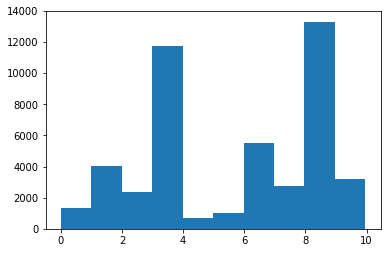

In [3]:
# filtra as classificacoes erradas 




print(sizedataset)

print('Distribuição das classificações do nosso dataset' )



import matplotlib.pyplot as plt
plt.hist(labels)
plt.show()






Arquiterura da solução  
    1. Input
    2. Hiden layer com duas camadas (w1 e w2)
    3. Camada fincal WF
    4. Função custo distância vetorial  
    


<img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1547672259/3_qwv5gr.png">







In [9]:
# meta parametros para nossa rede neural 


optimizerrate = 0.01


# Network Parameters
num_input = 10000 # MNIST data input (img shape: 28*28)
matrixSize = 10000
n_hidden_1 = 2000 # 2000 1st layer number of neurons
n_hidden_2 = 200 # 100  layer number of neurons
num_classes = 1 # regreção lineas 
print(sizedataset)


45962


In [18]:

import tensorflow as tf
# num_input 10000
X = tf.placeholder(tf.dtypes.float32, [None, num_input])
Y = tf.placeholder(tf.dtypes.float32, [None])


# layer 1 (.. X,  2000) 

w1 = tf.Variable(tf.random_normal([n_hidden_1 , num_input], stddev=0.35,
                                  dtype=tf.dtypes.float32 ),
                        name="w1" , dtype=tf.dtypes.float32 )

b1 = tf.Variable(tf.zeros([n_hidden_1, 1]), name='b1', dtype=tf.dtypes.float32)

y1 = tf.nn.relu(tf.add(tf.matmul(w1, tf.transpose(X)), b1), name='y1')

# layer 2 (.. X,  100) 

w2 = tf.Variable(tf.random_normal([n_hidden_2 , n_hidden_1], stddev=0.35),
                        name="w2" , dtype=tf.dtypes.float32 )

b2 = tf.Variable(tf.zeros([n_hidden_2, 1]), name='b2', dtype=tf.dtypes.float32)

y2 = tf.nn.relu(tf.add(tf.matmul(w2, y1), b2), name='y2')



# last lawer (.. X, 1) 

wf = tf.Variable(tf.random_normal([num_classes , n_hidden_2], stddev=0.35),
                        name="wf" , dtype=tf.dtypes.float32 )

bf = tf.Variable(tf.zeros([num_classes, 1]), name='bf', dtype=tf.dtypes.float32)

y_f  = tf.add(tf.matmul(wf, y2), bf, name="y_f")



#y1 = tf.matmul(w1, tf.transpose(X))

print(w2)
print(b2)
print(y2)

#Returns (x - y)(x - y) element-wise.
loss = tf.reduce_mean(tf.squared_difference(y_f, Y))

#optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001).minimize(loss)
 
optimizer = tf.train.AdamOptimizer(learning_rate=optimizerrate).minimize(loss)



<tf.Variable 'w2_1:0' shape=(200, 2000) dtype=float32_ref>
<tf.Variable 'b2_1:0' shape=(200, 1) dtype=float32_ref>
Tensor("y2_1:0", shape=(200, ?), dtype=float32)


In [19]:
session = tf.Session()
session.run(tf.global_variables_initializer())

#2.2534682e+19
#45962
bachsize = 300
ntraining = 1600
print( n_hidden_1 ,'X', n_hidden_2, optimizerrate ,  bachsize , ntraining,  '=' ) 

for i in range(ntraining):

    xbach, ybach  = getbachTrain(bachsize)
    feed_dict_train = {X: xbach,   Y: ybach}
    result = session.run(optimizer, feed_dict=feed_dict_train)
    if i % 100  == 0:
        resultloss = session.run(loss, feed_dict=feed_dict_train)
        print('Optimization Iteration: ', i,  ' erro  médio: ', ((resultloss ** (1/2)))  )
        
        



print('f', resultloss)



2000 X 200 0.01 300 1600 =
Optimization Iteration:  0  erro  médio:  6934.969069866137
Optimization Iteration:  100  erro  médio:  5.9641699669589725
Optimization Iteration:  200  erro  médio:  4.885870721968807
Optimization Iteration:  300  erro  médio:  4.22581286313628
Optimization Iteration:  400  erro  médio:  3.4610442754321222
Optimization Iteration:  500  erro  médio:  3.1654620807445077
Optimization Iteration:  600  erro  médio:  2.728566742010664
Optimization Iteration:  700  erro  médio:  2.6711253402818995
Optimization Iteration:  800  erro  médio:  2.3005912974365037
Optimization Iteration:  900  erro  médio:  2.21005047908802
Optimization Iteration:  1000  erro  médio:  2.084035055872435
Optimization Iteration:  1100  erro  médio:  1.9492844320174307
Optimization Iteration:  1200  erro  médio:  1.8104077463694812
Optimization Iteration:  1300  erro  médio:  1.7423880423176683
Optimization Iteration:  1400  erro  médio:  1.8041799913344543
Optimization Iteration:  1500  er